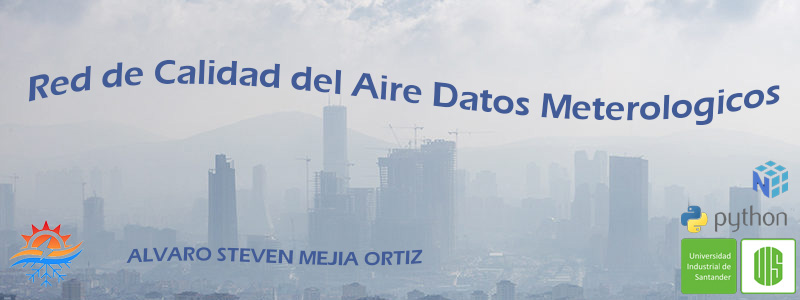

#**Red de Calidad del Aire Datos Meterologicos**

# **Introducción**

La calidad del aire y las condiciones meteorológicas son aspectos fundamentales para comprender y abordar los desafíos ambientales y de salud en una región específica. En este proyecto, nos enfocamos en la predicción de magnitudes meteorológicas clave utilizando técnicas avanzadas de aprendizaje automático.

La recopilación y análisis de datos meteorológicos son tareas cruciales para comprender los patrones climáticos y anticipar eventos extremos. Con el objetivo de mejorar la precisión de estas predicciones, se emplearán diversos modelos de aprendizaje automático, como Support Vector Machines (SVM), Gaussian Naive Bayes (GNB), Decision Trees, Random Forests y Redes Neuronales Profundas (DNN).

El conjunto de datos proporcionado contiene información detallada sobre diferentes magnitudes meteorológicas registradas en múltiples estaciones distribuidas en una región específica. Se explorarán variables como la provincia, municipio, estación, magnitud, punto de muestreo, año, mes, día y mediciones horarias (h01 hasta h24). El objetivo es desarrollar modelos capaces de predecir estas magnitudes en función de estas variables, permitiendo así anticipar condiciones meteorológicas con mayor precisión.

#**Objetivo**

El objetivo principal de este proyecto es desarrollar modelos de aprendizaje automático capaces de predecir con precisión las magnitudes meteorológicas futuras en una región específica.

#**Dataset**

Datos meteorológicos horarios desde el año 2023 recogidos por las estaciones de medición de la Red de Calidad del Aire de la Comunidad de Madrid: valores medios horarios de velocidad del viento, dirección del viento, temperatura, humedad relativa, presión atmosférica, radiación solar y precipitación.

https://datos.comunidad.madrid/catalogo/dataset/calidad_aire_datos_meteo_historico

#**Enlace del video**

https://youtu.be/KEiQdYGGlmc

#**Modelos usados para el desarrollo**

Utilizaremos diversas técnicas de modelado, incluyendo Random Forests, Decision Trees, Support Vector Machines (SVM) y Gaussian Naive Bayes (GNB),  y  los cuales han sido abordados durante el curso.

#Manejo de datos


In [2]:
#@title Imports
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.filterwarnings("ignore")

In [3]:
registro_2023 = pd.read_csv('/content/2023.csv', delimiter=';')
data_rows, data_cols = registro_2023.shape
print(f'There are {data_rows} rows and {data_cols} columns')
registro_2023.head(10)

There are 45001 rows and 56 columns


,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,81,28102001_81_89,2023,1,1,1.0,V,...,2.0,V,2.0,V,2.0,V,3.0,V,2.0,V
1,28,102,1,82,28102001_82_89,2023,1,1,173.0,V,...,173.0,V,184.0,V,184.0,V,127.0,V,156.0,V
2,28,102,1,83,28102001_83_89,2023,1,1,7.0,V,...,10.0,V,11.0,V,11.0,V,11.0,V,10.0,V
3,28,102,1,86,28102001_86_89,2023,1,1,50.0,V,...,40.0,V,37.0,V,38.0,V,37.0,V,41.0,V
4,28,102,1,87,28102001_87_89,2023,1,1,932.0,V,...,928.0,V,928.0,V,928.0,V,928.0,V,929.0,V
5,28,102,1,88,28102001_88_89,2023,1,1,14.0,V,...,15.0,V,15.0,V,15.0,V,15.0,V,15.0,V
6,28,102,1,89,28102001_89_89,2023,1,1,0.0,V,...,0.0,V,0.0,V,0.0,V,0.0,V,0.0,V
7,28,120,1,81,28120001_81_89,2023,1,1,1.0,V,...,3.0,V,4.0,V,3.0,V,4.0,V,3.0,V
8,28,120,1,82,28120001_82_89,2023,1,1,205.0,V,...,206.0,V,222.0,V,218.0,V,220.0,V,211.0,V
9,28,120,1,83,28120001_83_89,2023,1,1,5.0,V,...,4.0,V,4.0,V,4.0,V,3.0,V,3.0,V


Aqui se elimina la columa Punto muestreo ya que no es relevante para los datos estadisticos que se quieren considerar.

In [4]:
registro_2023_copy = pd.read_csv('/content/2023.csv', delimiter=';')
registro_2023_copy = registro_2023_copy.drop(columns=['punto_muestreo'])
registro_2023_copy.head(10)

,provincia,municipio,estacion,magnitud,ano,mes,dia,h01,v01,h02,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,81,2023,1,1,1.0,V,1.0,...,2.0,V,2.0,V,2.0,V,3.0,V,2.0,V
1,28,102,1,82,2023,1,1,173.0,V,138.0,...,173.0,V,184.0,V,184.0,V,127.0,V,156.0,V
2,28,102,1,83,2023,1,1,7.0,V,7.0,...,10.0,V,11.0,V,11.0,V,11.0,V,10.0,V
3,28,102,1,86,2023,1,1,50.0,V,51.0,...,40.0,V,37.0,V,38.0,V,37.0,V,41.0,V
4,28,102,1,87,2023,1,1,932.0,V,932.0,...,928.0,V,928.0,V,928.0,V,928.0,V,929.0,V
5,28,102,1,88,2023,1,1,14.0,V,14.0,...,15.0,V,15.0,V,15.0,V,15.0,V,15.0,V
6,28,102,1,89,2023,1,1,0.0,V,0.0,...,0.0,V,0.0,V,0.0,V,0.0,V,0.0,V
7,28,120,1,81,2023,1,1,1.0,V,2.0,...,3.0,V,4.0,V,3.0,V,4.0,V,3.0,V
8,28,120,1,82,2023,1,1,205.0,V,212.0,...,206.0,V,222.0,V,218.0,V,220.0,V,211.0,V
9,28,120,1,83,2023,1,1,5.0,V,5.0,...,4.0,V,4.0,V,4.0,V,3.0,V,3.0,V


Se va a observar los valores en la casilla de verificacion

In [5]:
valores_unicos = registro_2023_copy['v01'].unique()
print('valores v01', valores_unicos)
valores_unicos = registro_2023_copy['v02'].unique()
print('valores v02', valores_unicos)
valores_unicos = registro_2023_copy['v03'].unique()
print('valores v03', valores_unicos)
valores_unicos = registro_2023_copy['v04'].unique()
print('valores v04', valores_unicos)
valores_unicos = registro_2023_copy['v05'].unique()
print('valores v05', valores_unicos)
valores_unicos = registro_2023_copy['v06'].unique()
print('valores v06', valores_unicos)
valores_unicos = registro_2023_copy['v07'].unique()
print('valores v07', valores_unicos)
valores_unicos = registro_2023_copy['v08'].unique()
print('valores v08', valores_unicos)
valores_unicos = registro_2023_copy['v09'].unique()
print('valores v09', valores_unicos)
valores_unicos = registro_2023_copy['v10'].unique()
print('valores v10', valores_unicos)
valores_unicos = registro_2023_copy['v11'].unique()
print('valores v11', valores_unicos)
valores_unicos = registro_2023_copy['v12'].unique()
print('valores v12', valores_unicos)
valores_unicos = registro_2023_copy['v13'].unique()
print('valores v13', valores_unicos)
valores_unicos = registro_2023_copy['v14'].unique()
print('valores v14', valores_unicos)
valores_unicos = registro_2023_copy['v15'].unique()
print('valores v15', valores_unicos)
valores_unicos = registro_2023_copy['v16'].unique()
print('valores v16', valores_unicos)
valores_unicos = registro_2023_copy['v17'].unique()
print('valores v17', valores_unicos)
valores_unicos = registro_2023_copy['v18'].unique()
print('valores v18', valores_unicos)
valores_unicos = registro_2023_copy['v19'].unique()
print('valores v19', valores_unicos)
valores_unicos = registro_2023_copy['v20'].unique()
print('valores v20', valores_unicos)
valores_unicos = registro_2023_copy['v21'].unique()
print('valores v21', valores_unicos)
valores_unicos = registro_2023_copy['v22'].unique()
print('valores v22', valores_unicos)
valores_unicos = registro_2023_copy['v23'].unique()
print('valores v23', valores_unicos)
valores_unicos = registro_2023_copy['v24'].unique()
print('valores v24', valores_unicos)

valores v01 ['V' 'N']
valores v02 ['V' 'N']
valores v03 ['V' 'N']
valores v04 ['V' 'N']
valores v05 ['V' 'N']
valores v06 ['V' 'N']
valores v07 ['V' 'N']
valores v08 ['V' 'N']
valores v09 ['V' 'N']
valores v10 ['V' 'N']
valores v11 ['V' 'N']
valores v12 ['V' 'N']
valores v13 ['V' 'N']
valores v14 ['V' 'N']
valores v15 ['V' 'N']
valores v16 ['V' 'N']
valores v17 ['V' 'N']
valores v18 ['V' 'N']
valores v19 ['V' 'N']
valores v20 ['V' 'N']
valores v21 ['V' 'N']
valores v22 ['V' 'N']
valores v23 ['V' 'N']
valores v24 ['V' 'N']


Para las columas de Verificacion se asiganra a las letras "V=1" y "N=0"

In [6]:
reemplazo = {'V': 1, 'N': 0}

# Aplicar el reemplazo en la columna 'v01'
registro_2023_copy['v01'] = registro_2023_copy['v01'].replace(reemplazo)
registro_2023_copy['v02'] = registro_2023_copy['v02'].replace(reemplazo)
registro_2023_copy['v03'] = registro_2023_copy['v03'].replace(reemplazo)
registro_2023_copy['v04'] = registro_2023_copy['v04'].replace(reemplazo)
registro_2023_copy['v05'] = registro_2023_copy['v05'].replace(reemplazo)
registro_2023_copy['v06'] = registro_2023_copy['v06'].replace(reemplazo)
registro_2023_copy['v07'] = registro_2023_copy['v07'].replace(reemplazo)
registro_2023_copy['v08'] = registro_2023_copy['v08'].replace(reemplazo)
registro_2023_copy['v09'] = registro_2023_copy['v09'].replace(reemplazo)
registro_2023_copy['v10'] = registro_2023_copy['v10'].replace(reemplazo)
registro_2023_copy['v11'] = registro_2023_copy['v11'].replace(reemplazo)
registro_2023_copy['v12'] = registro_2023_copy['v12'].replace(reemplazo)
registro_2023_copy['v13'] = registro_2023_copy['v13'].replace(reemplazo)
registro_2023_copy['v14'] = registro_2023_copy['v14'].replace(reemplazo)
registro_2023_copy['v15'] = registro_2023_copy['v15'].replace(reemplazo)
registro_2023_copy['v16'] = registro_2023_copy['v16'].replace(reemplazo)
registro_2023_copy['v17'] = registro_2023_copy['v17'].replace(reemplazo)
registro_2023_copy['v18'] = registro_2023_copy['v18'].replace(reemplazo)
registro_2023_copy['v19'] = registro_2023_copy['v19'].replace(reemplazo)
registro_2023_copy['v20'] = registro_2023_copy['v20'].replace(reemplazo)
registro_2023_copy['v21'] = registro_2023_copy['v21'].replace(reemplazo)
registro_2023_copy['v22'] = registro_2023_copy['v22'].replace(reemplazo)
registro_2023_copy['v23'] = registro_2023_copy['v23'].replace(reemplazo)
registro_2023_copy['v24'] = registro_2023_copy['v24'].replace(reemplazo)

Se verifican resultados

In [7]:
registro_2023_copy.head(10)

,provincia,municipio,estacion,magnitud,ano,mes,dia,h01,v01,h02,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,81,2023,1,1,1.0,1,1.0,...,2.0,1,2.0,1,2.0,1,3.0,1,2.0,1
1,28,102,1,82,2023,1,1,173.0,1,138.0,...,173.0,1,184.0,1,184.0,1,127.0,1,156.0,1
2,28,102,1,83,2023,1,1,7.0,1,7.0,...,10.0,1,11.0,1,11.0,1,11.0,1,10.0,1
3,28,102,1,86,2023,1,1,50.0,1,51.0,...,40.0,1,37.0,1,38.0,1,37.0,1,41.0,1
4,28,102,1,87,2023,1,1,932.0,1,932.0,...,928.0,1,928.0,1,928.0,1,928.0,1,929.0,1
5,28,102,1,88,2023,1,1,14.0,1,14.0,...,15.0,1,15.0,1,15.0,1,15.0,1,15.0,1
6,28,102,1,89,2023,1,1,0.0,1,0.0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1
7,28,120,1,81,2023,1,1,1.0,1,2.0,...,3.0,1,4.0,1,3.0,1,4.0,1,3.0,1
8,28,120,1,82,2023,1,1,205.0,1,212.0,...,206.0,1,222.0,1,218.0,1,220.0,1,211.0,1
9,28,120,1,83,2023,1,1,5.0,1,5.0,...,4.0,1,4.0,1,4.0,1,3.0,1,3.0,1


In [8]:
valor_reemplazo = 0  # Por ejemplo, reemplazar NaN con 0
registro_2023_copy['h01'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h02'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h03'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h04'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h05'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h06'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h07'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h08'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h09'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h10'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h11'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h12'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h13'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h14'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h15'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h16'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h17'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h18'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h19'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h20'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h21'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h22'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h23'].fillna(valor_reemplazo, inplace=True)
registro_2023_copy['h24'].fillna(valor_reemplazo, inplace=True)

In [9]:
valores_unicos = registro_2023_copy['h01'].unique()
print('valores h1', valores_unicos)

valores h1 [  1. 173.   7.  50. 932.  14.   0. 205.   5.  68. 818.  91.  72. 958.
   8. 250.   6.  74. 964. 266.   9.  78. 943.  17.   4.  90. 107.  87.
 309.  57. 908. 220.  82. 954.  40. 968. 222.  58. 940.  37.  55. 920.
 241.  71. 926. 302.   3.  81. 959.  70.  75. 960. 297.  65. 945.  95.
 948. 141. 956.  53.  88. 929.  59. 946.  24.  80.   2. 944.  67.  62.
  69.  66. 952.  47. 219.  97. 814. 196.  12. 186.  56. 962. 239.  10.
 939. 192.  11. 258. 955.  52. 904. 226.  64. 951. 244.  83. 966. 267.
  48. 937. 212. 916. 147. 922. 247. 953. 229.  51. 338.  63. 941. 255.
  60. 289. 224. 924. 300. 243.  73. 215. 280. 949. 100. 933. 348.  -1.
 346.  85. 207.  76. 181. 130. 156.  79. 909. 242.  92. 969. 102. 306.
 921. 927. 317.  77.  46. 961. 333.  39. 319. 294. 292. 950. 275.  86.
 318. 938.  16.  23. 823. 177. 252. 187. 101.  96. 965. 281. 914. 151.
  94. 972. 312.  84.  43. 967. 273. 308. 963. 934. 264.  93.  33.  26.
  38. 971. 263. 347.  99. 913. 260. 304. 180.  13. 223. 256. 116. 

In [10]:
print(registro_2023_copy['h01'])

0          1.0
1        173.0
2          7.0
3         50.0
4        932.0
         ...  
44996     18.0
44997     42.0
44998    939.0
44999      0.0
45000      0.0
Name: h01, Length: 45001, dtype: float64


In [11]:
columnas_seleccionadas = ['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']
data_seleccionado = registro_2023_copy[columnas_seleccionadas]

In [12]:
correlacion = data_seleccionado.corr()

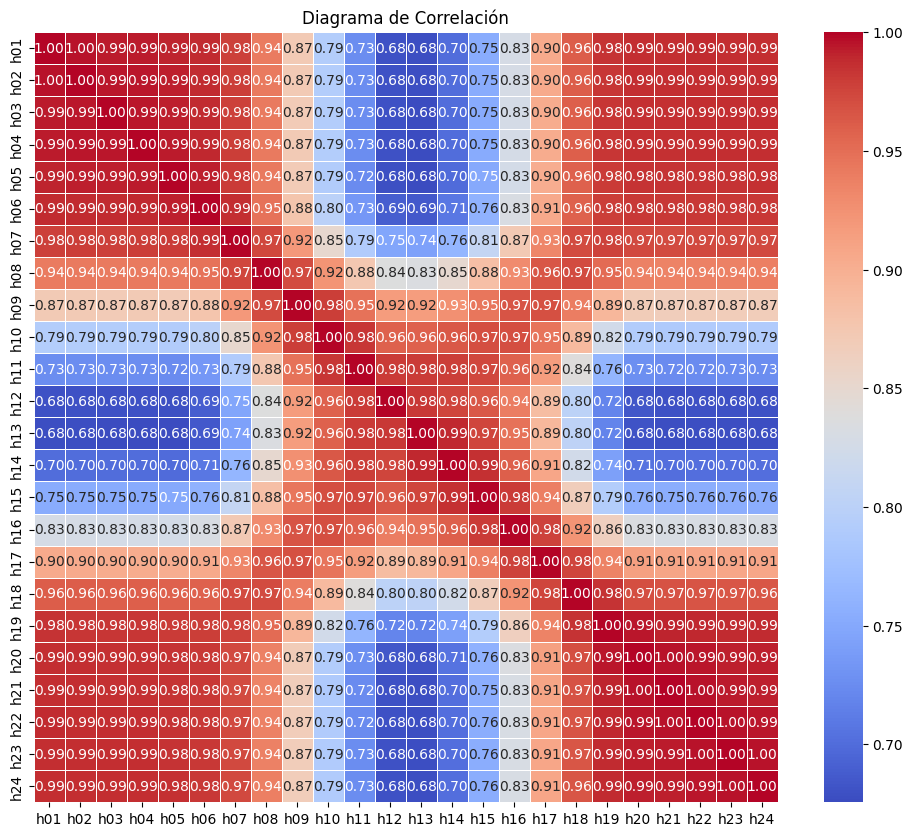

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Diagrama de Correlación')
plt.show()


algunas que tienen mayor contaminacion tienen cierta correlacion aunque no es tan relevante

In [14]:
valores_unicos = registro_2023_copy['municipio'].unique()
print('valores municipio', valores_unicos)

valores municipio [102 120 123  13 133  14 148  16 161 171 180  45  47  49   5  58   6  65
  67   7  74  80   9  92 134 115 106 127]


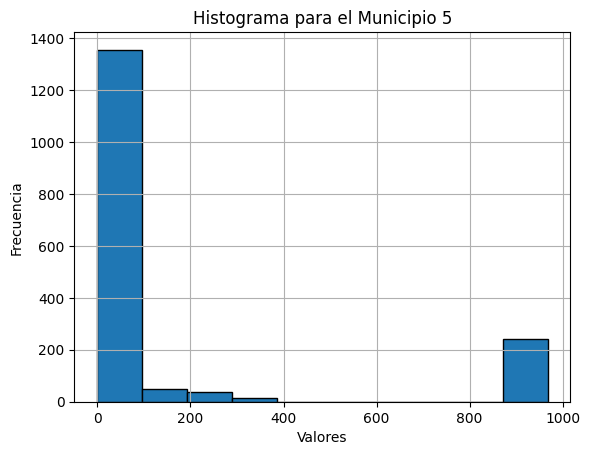

In [15]:
municipio_5_data = registro_2023_copy[registro_2023_copy['municipio'] == 5]  # Asume que la columna se llama 'Municipio'

# Selecciona la columna de interés para el histograma (por ejemplo, 'Datos')
columna_interes = 'h01'  # Reemplaza 'Datos' con el nombre de tu columna

# Crea el histograma
plt.hist(municipio_5_data[columna_interes], bins=10, edgecolor='k')  # Puedes ajustar el número de bins según tu preferencia
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma para el Municipio 5')
plt.grid(True)

# Muestra el histograma
plt.show()

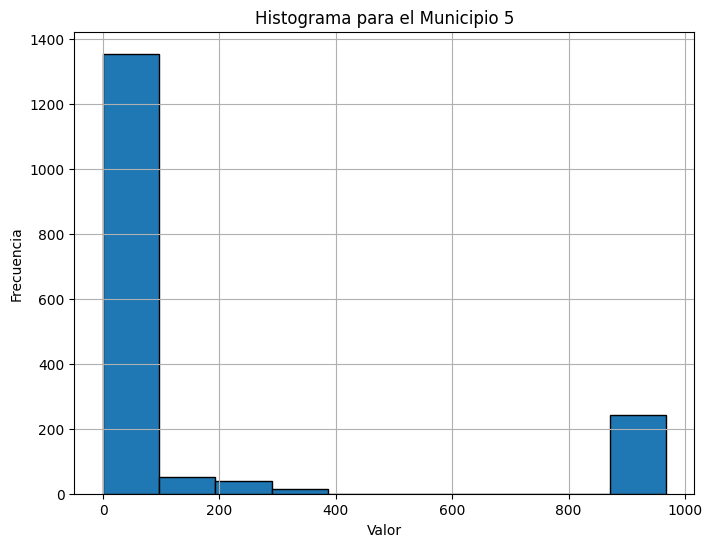

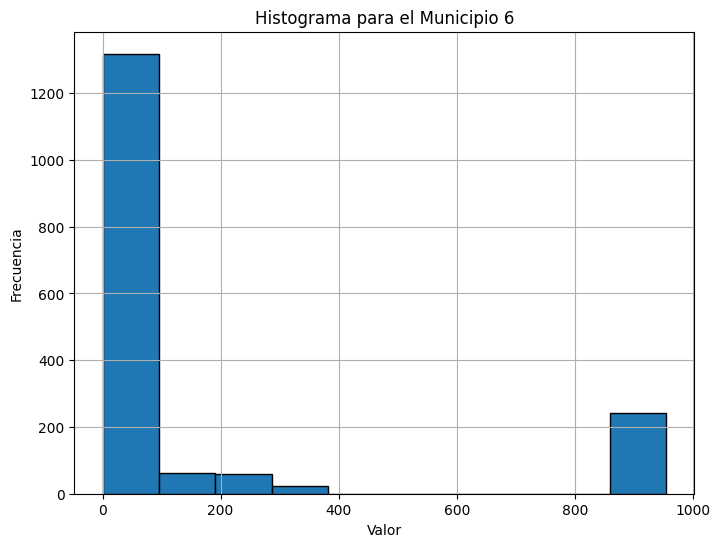

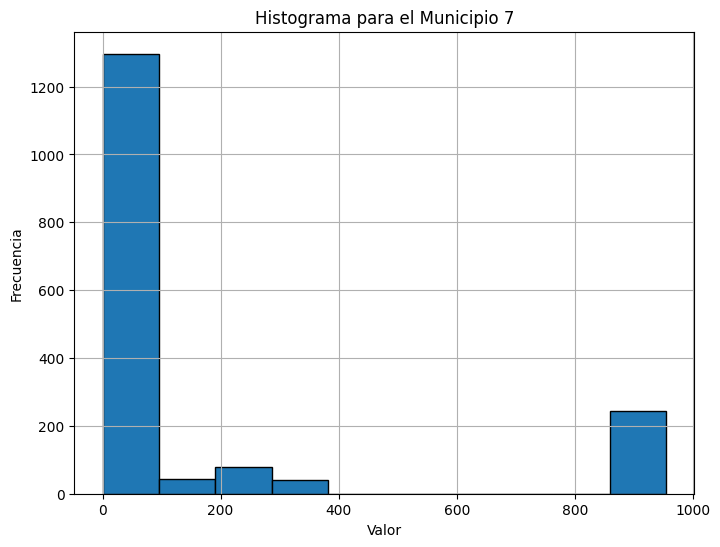

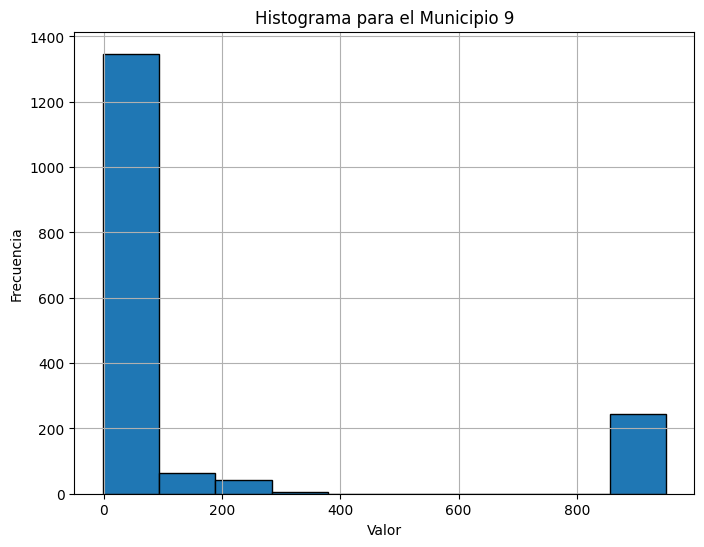

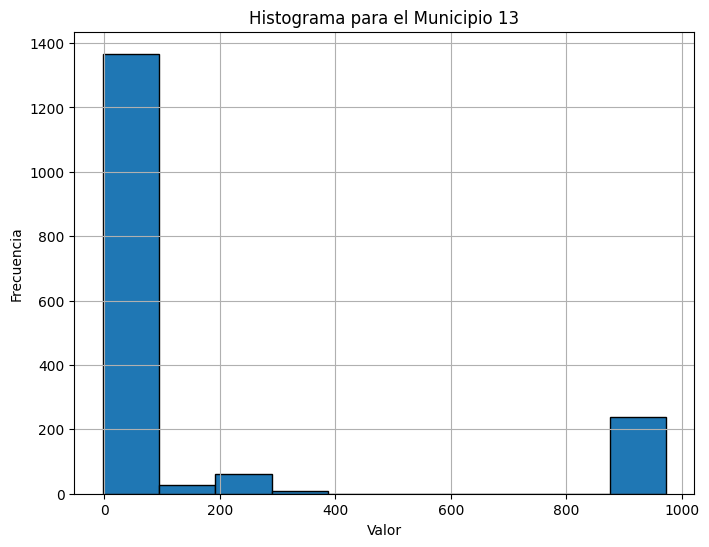

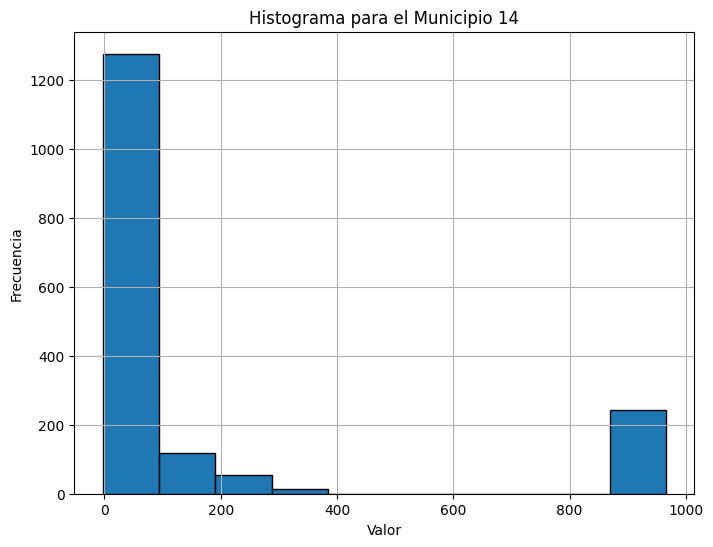

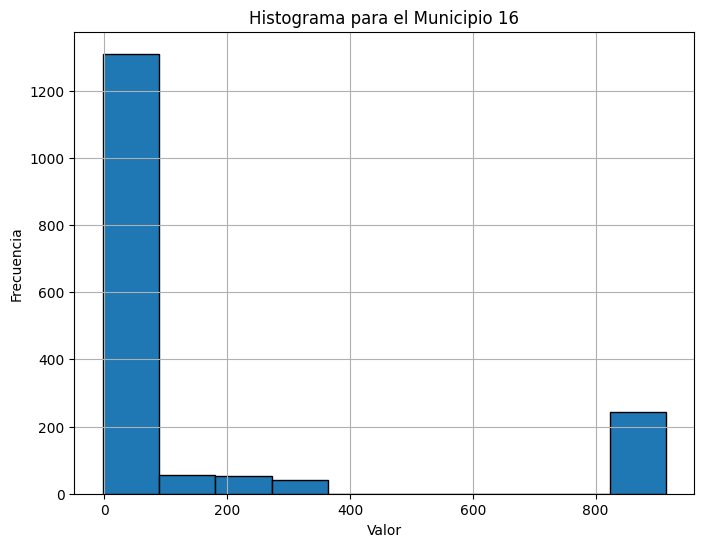

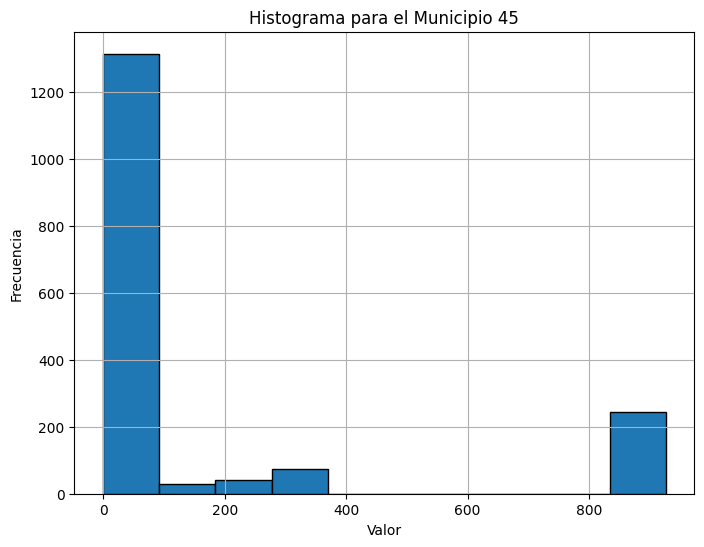

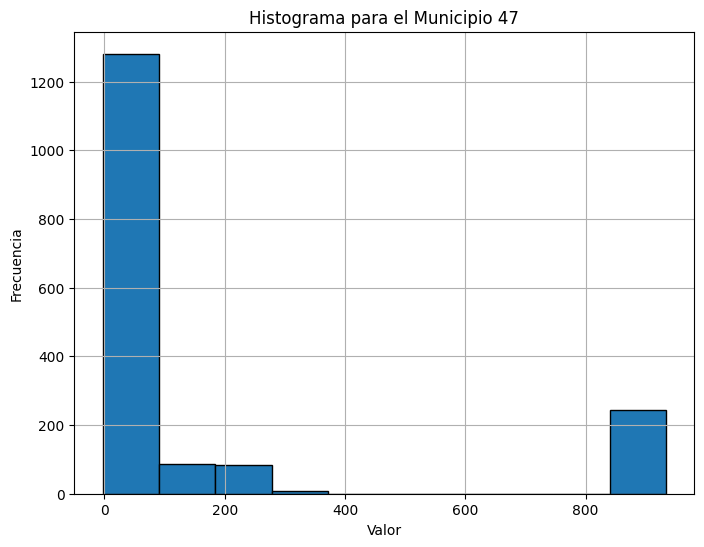

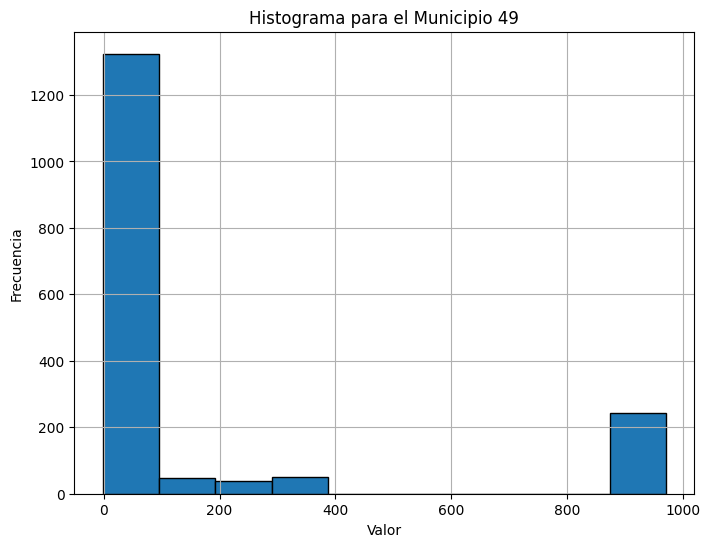

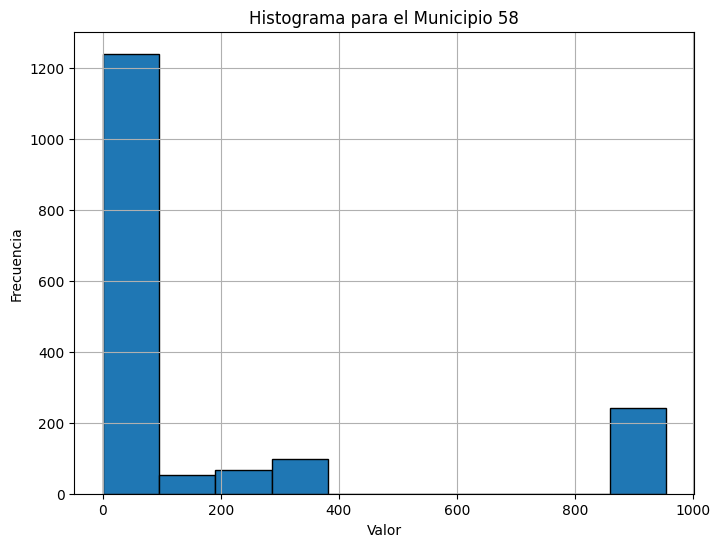

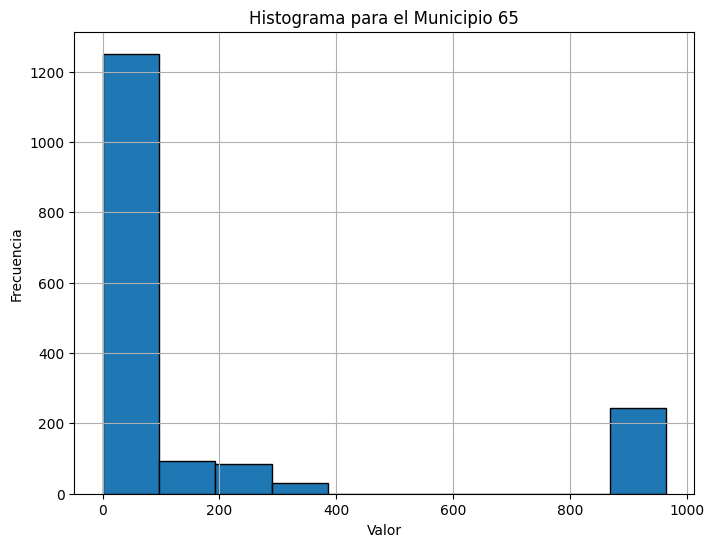

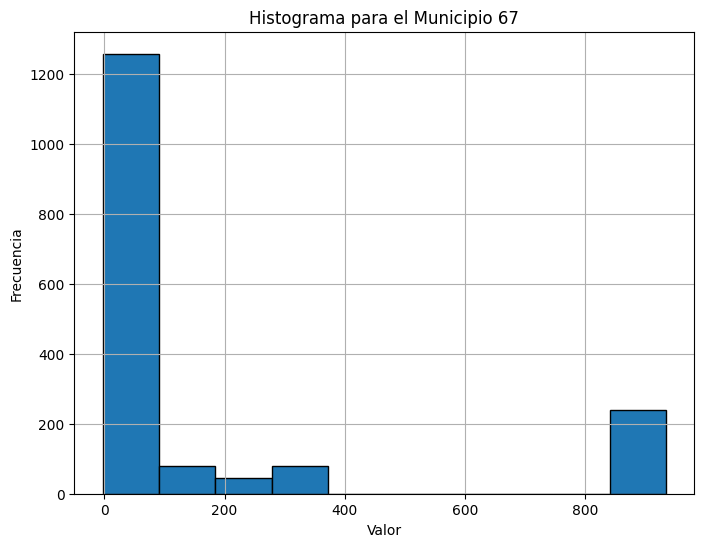

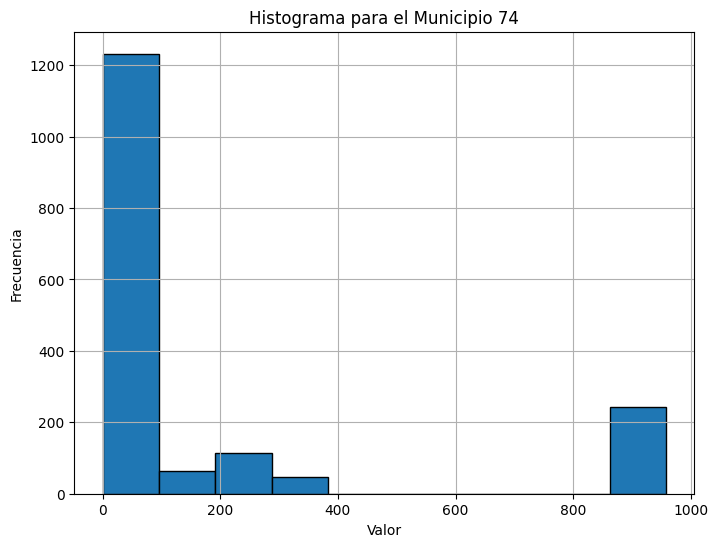

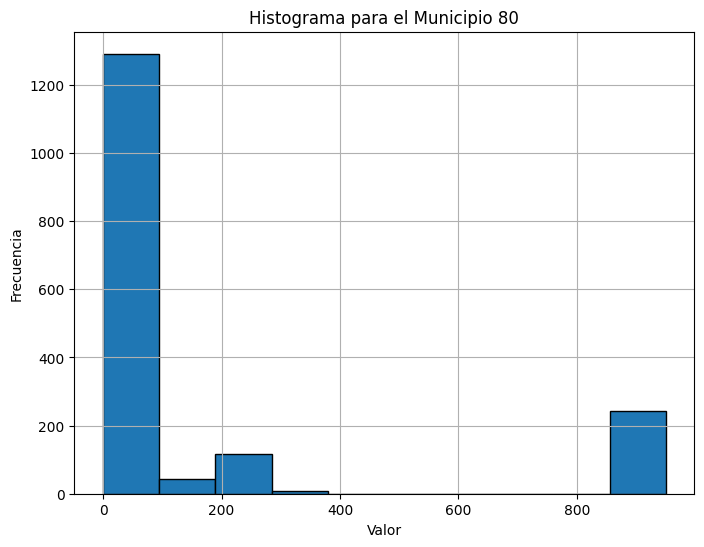

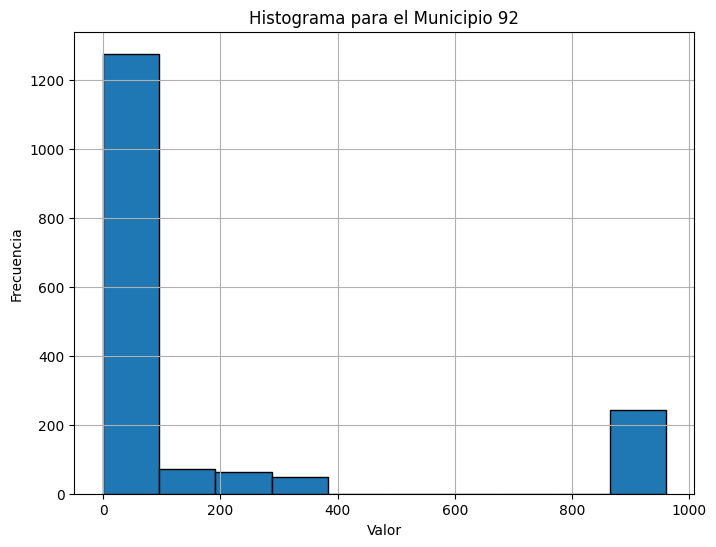

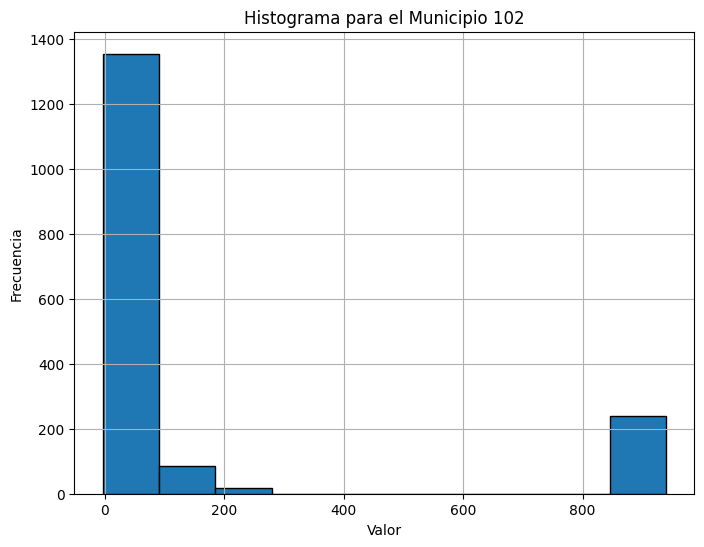

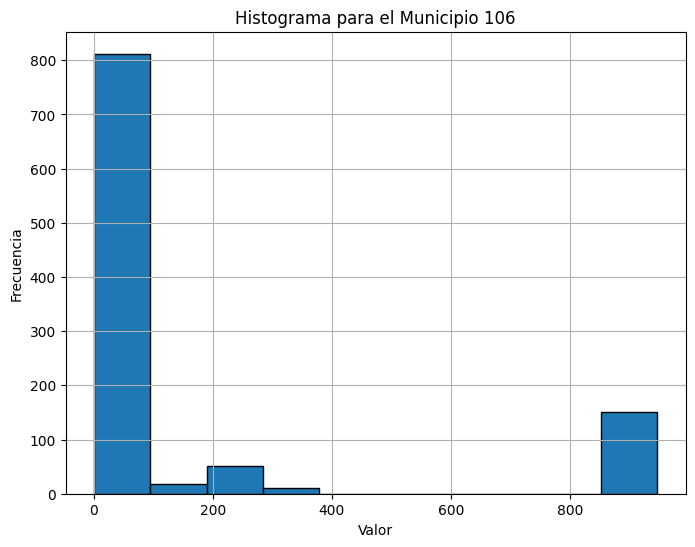

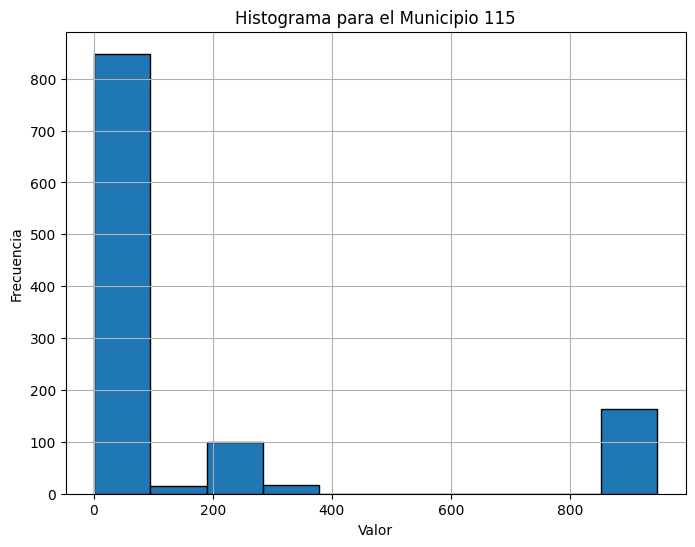

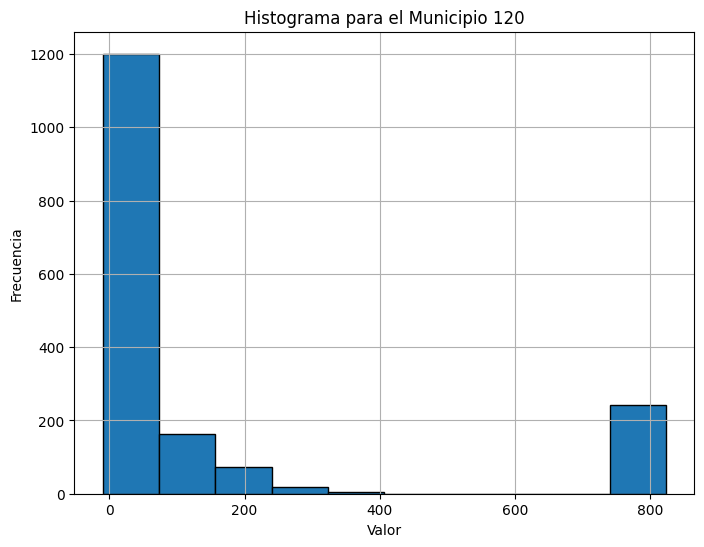

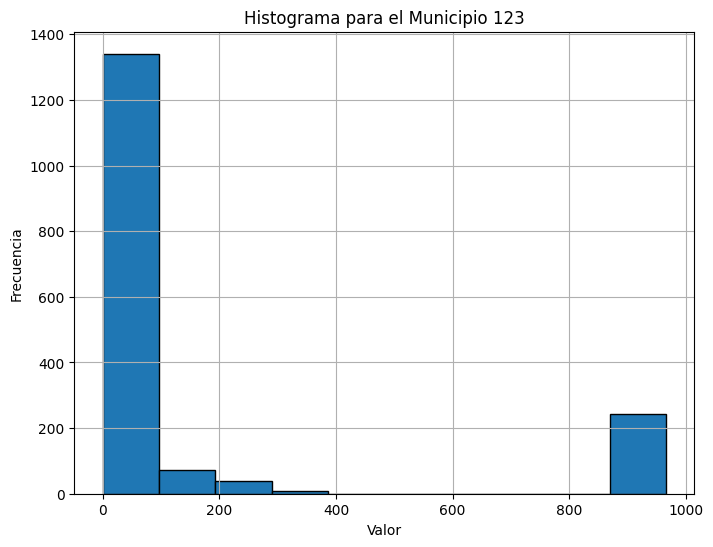

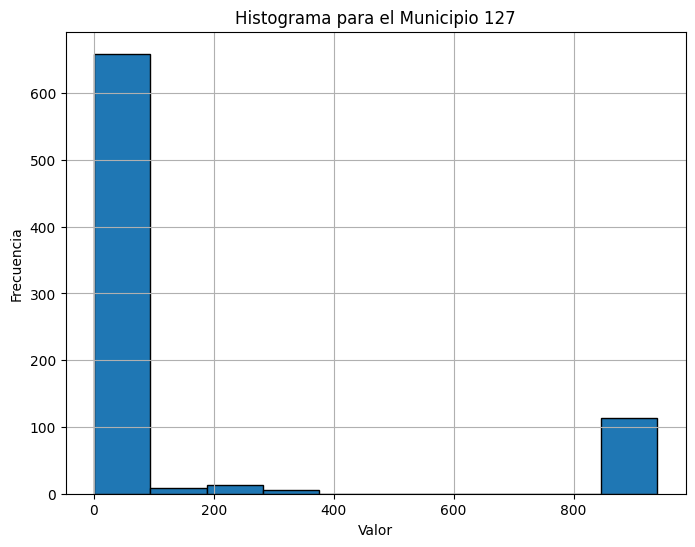

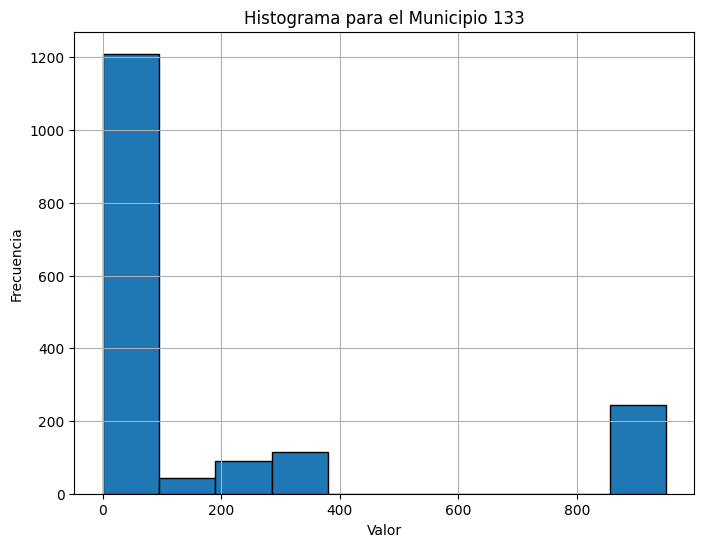

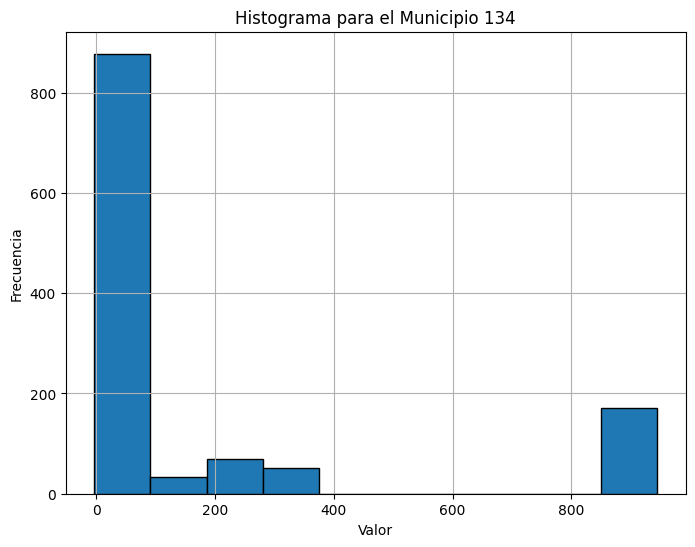

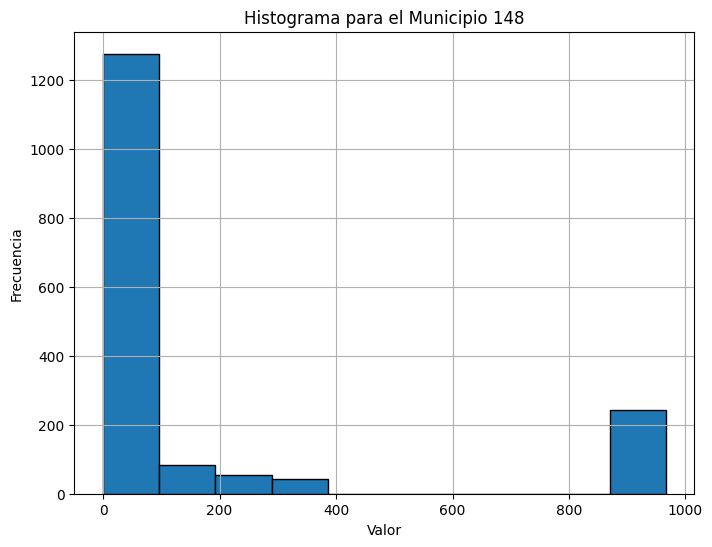

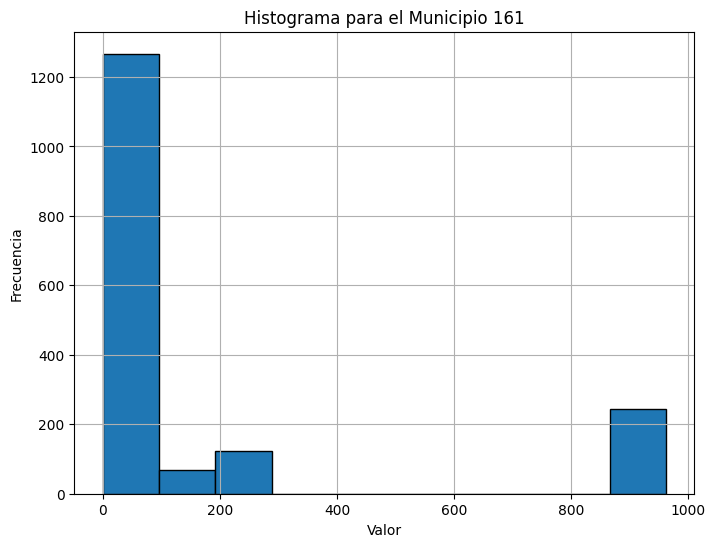

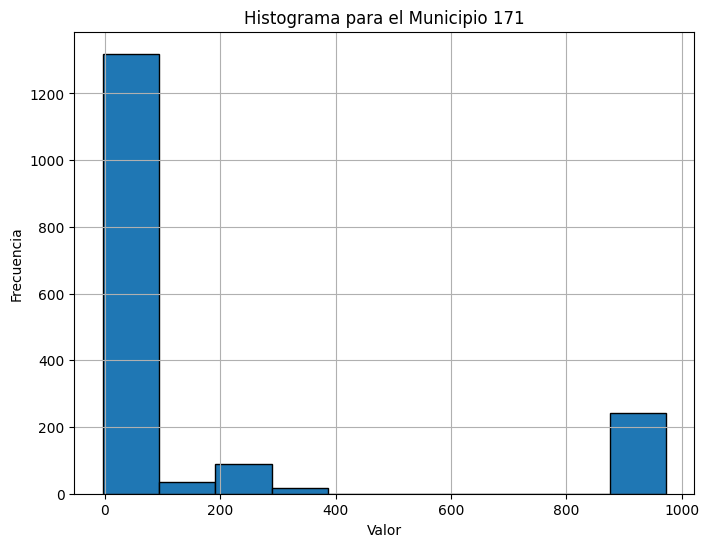

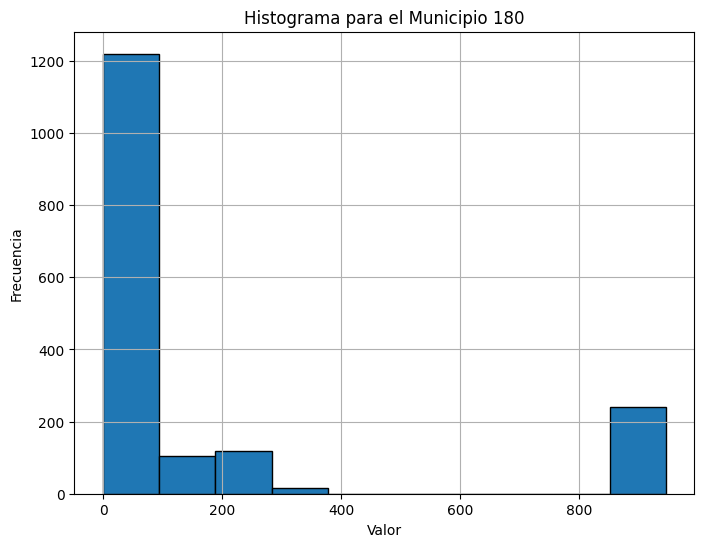

In [16]:
municipios_interes = [5, 6, 7, 9, 13, 14, 16, 45, 47, 49, 58, 65, 67, 74, 80, 92, 102, 106, 115, 120, 123, 127, 133, 134, 148, 161, 171, 180]

# Itera sobre los municipios y crea un histograma para cada uno
for municipio in municipios_interes:
    data_municipio = registro_2023_copy[registro_2023_copy['municipio'] == municipio]

    plt.figure(figsize=(8, 6))
    plt.hist(data_municipio['h01'], bins=10, edgecolor='black')
    plt.title(f'Histograma para el Municipio {municipio}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

In [18]:
# Lista de municipios de interés
municipios_interes = [5, 6, 7, 9, 13, 14, 16, 45, 47, 49, 58, 65, 67, 74, 80, 92, 102, 106, 115, 120, 123, 127, 133, 134, 148, 161, 171, 180]

# Columnas de interés (h01 hasta h24)
columnas_interes = ['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']

# Itera sobre los municipios y crea un diagrama de dispersión para cada par de columnas
for municipio in municipios_interes:
    data_municipio = registro_2023_copy[registro_2023_copy['municipio'] == municipio]

    # Genera todas las combinaciones de pares de columnas
    for i in range(len(columnas_interes)):
        for j in range(i + 1, len(columnas_interes)):
            columna_x = columnas_interes[i]
            columna_y = columnas_interes[j]

            #plt.figure(figsize=(8, 6))
            #plt.scatter(data_municipio[columna_x], data_municipio[columna_y], alpha=0.5)
            #plt.title(f'Diagrama de Dispersión para el Municipio {municipio}\nColumna {columna_x} vs. Columna {columna_y}')
            #plt.xlabel(f'{columna_x}')
            #plt.ylabel(f'{columna_y}')
            #plt.grid(True)
            #plt.show()

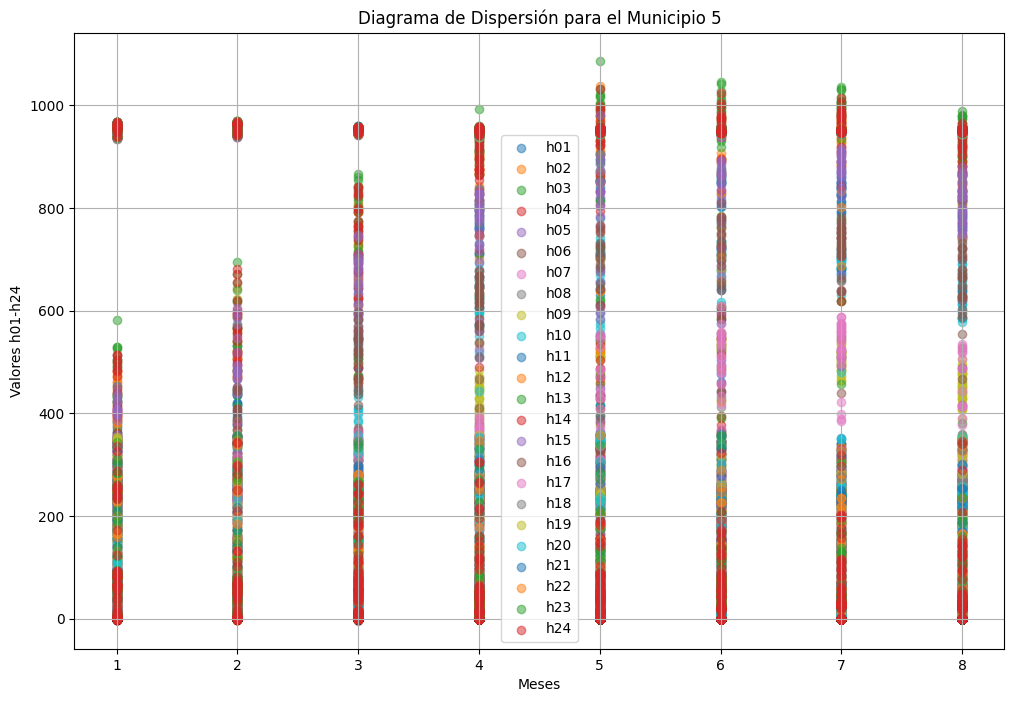

In [17]:
data_municipio_5 = registro_2023_copy[registro_2023_copy['municipio'] == 5]

# Selecciona las columnas h01 hasta h24
columnas_h = ['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']

# Crea el diagrama de dispersión
plt.figure(figsize=(12, 8))
for columna in columnas_h:
    plt.scatter(data_municipio_5['mes'], data_municipio_5[columna], label=columna, alpha=0.5)

plt.title('Diagrama de Dispersión para el Municipio 5')
plt.xlabel('Meses')
plt.ylabel('Valores h01-h24')
plt.legend()
plt.grid(True)
plt.show()

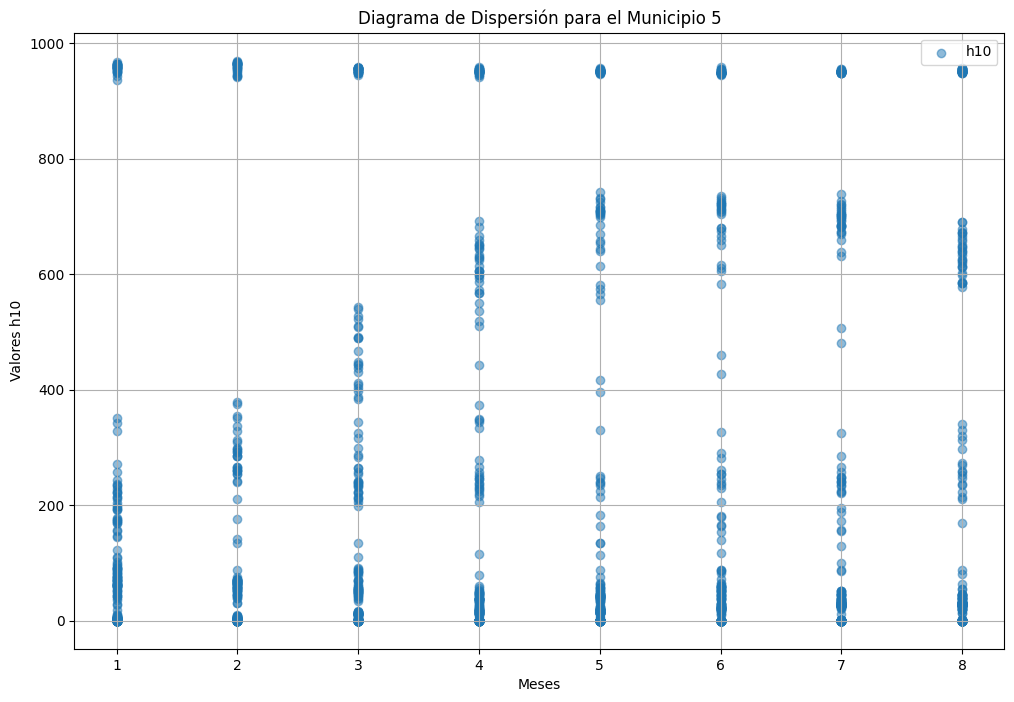

In [18]:
data_municipio_5 = registro_2023_copy[registro_2023_copy['municipio'] == 5]

# Selecciona las columnas h01 hasta h24
columnas_h = ['h10']

# Crea el diagrama de dispersión
plt.figure(figsize=(12, 8))
for columna in columnas_h:
    plt.scatter(data_municipio_5['mes'], data_municipio_5[columna], label=columna, alpha=0.5)

plt.title('Diagrama de Dispersión para el Municipio 5')
plt.xlabel('Meses')
plt.ylabel('Valores h10')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
valores_unicos = registro_2023_copy['h01'].unique()
print('valores h01', valores_unicos)

valores h01 [  1. 173.   7.  50. 932.  14.   0. 205.   5.  68. 818.  91.  72. 958.
   8. 250.   6.  74. 964. 266.   9.  78. 943.  17.   4.  90. 107.  87.
 309.  57. 908. 220.  82. 954.  40. 968. 222.  58. 940.  37.  55. 920.
 241.  71. 926. 302.   3.  81. 959.  70.  75. 960. 297.  65. 945.  95.
 948. 141. 956.  53.  88. 929.  59. 946.  24.  80.   2. 944.  67.  62.
  69.  66. 952.  47. 219.  97. 814. 196.  12. 186.  56. 962. 239.  10.
 939. 192.  11. 258. 955.  52. 904. 226.  64. 951. 244.  83. 966. 267.
  48. 937. 212. 916. 147. 922. 247. 953. 229.  51. 338.  63. 941. 255.
  60. 289. 224. 924. 300. 243.  73. 215. 280. 949. 100. 933. 348.  -1.
 346.  85. 207.  76. 181. 130. 156.  79. 909. 242.  92. 969. 102. 306.
 921. 927. 317.  77.  46. 961. 333.  39. 319. 294. 292. 950. 275.  86.
 318. 938.  16.  23. 823. 177. 252. 187. 101.  96. 965. 281. 914. 151.
  94. 972. 312.  84.  43. 967. 273. 308. 963. 934. 264.  93.  33.  26.
  38. 971. 263. 347.  99. 913. 260. 304. 180.  13. 223. 256. 116.

# **MODELO**

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import numpy as np

# Cargar el conjunto de datos
df = registro_2023_copy

# Filtrar datos para la Ciudad 5 y el rango de fechas (últimos 30 días)
df_ciudad5 = df[(df['municipio'] == 5) & (df['dia'] >= 1) & (df['dia'] <= 30) & (df['mes'] == 8)]

# Seleccionar columnas relevantes
features = df_ciudad5[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df_ciudad5['magnitud']

# Crear características de los 7 días anteriores
for day in range(1, 8):
    df_ciudad5[f'h01_d{day}'] = df_ciudad5['h01'].shift(day)
    # Repite para las otras horas h02 hasta h24

# Eliminar filas con valores nulos generados por el desplazamiento
df_ciudad5 = df_ciudad5.dropna()

# Reemplazar valores faltantes con cero
df_ciudad5 = df_ciudad5.fillna(0)

# Verificar que haya datos después de la eliminación de filas
if not df_ciudad5.empty:
    # Normalizar y realizar imputación
    features_normalized = preprocessing.scale(features)
    imputer = SimpleImputer(strategy='mean')
    features_imputed = imputer.fit_transform(features_normalized)

    # Inicializar el modelo Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Dividir el conjunto de datos para entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

    # Entrenar el modelo
    rf_model.fit(X_train, y_train)

    # Iterar desde el 1 hasta el 15 de septiembre
    for dia_prediccion in range(1, 7):
        # Crear un conjunto de datos para predecir el valor del día de septiembre
        datos_prediccion = df_ciudad5.iloc[-1:].copy()
        predicciones_dia = []  # Almacenar las predicciones para cada hora

        # Realizar la predicción para cada hora del día
        for hora in range(1, 25):
            # Ajustar el conjunto de datos de entrada con la información más reciente disponible
            for day in range(1, 8):
                datos_prediccion[f'h{hora:02d}_d{day}'] = datos_prediccion[f'h{hora:02d}'].shift(1)

            # Realizar la predicción
            prediccion_hora = rf_model.predict(datos_prediccion[features.columns])

            # Almacenar la predicción de la hora actual
            predicciones_dia.append(prediccion_hora[0])

            # Actualizar la última fila del conjunto de datos de entrada con la predicción actual
            datos_prediccion.iloc[0, :] = np.concatenate(([prediccion_hora[0]], datos_prediccion.iloc[0, 1:]))

        # Imprimir resultados
        print(f'Predicción para el {dia_prediccion} de septiembre en la Ciudad 5:')
        for hora, prediccion_hora in zip(range(1, 25), predicciones_dia):
            print(f'Hora {hora:02d}: {prediccion_hora}')
else:
    print("No hay suficientes datos después de la eliminación de filas para realizar la predicción.")


Predicción para el 1 de septiembre en la Ciudad 5:
Hora 01: 82.0
Hora 02: 82.0
Hora 03: 82.0
Hora 04: 82.0
Hora 05: 82.0
Hora 06: 82.0
Hora 07: 82.0
Hora 08: 82.0
Hora 09: 82.0
Hora 10: 82.0
Hora 11: 82.0
Hora 12: 82.0
Hora 13: 82.0
Hora 14: 82.0
Hora 15: 82.0
Hora 16: 82.0
Hora 17: 82.0
Hora 18: 82.0
Hora 19: 82.0
Hora 20: 82.0
Hora 21: 82.0
Hora 22: 82.0
Hora 23: 82.0
Hora 24: 82.0
Predicción para el 2 de septiembre en la Ciudad 5:
Hora 01: 82.0
Hora 02: 82.0
Hora 03: 82.0
Hora 04: 82.0
Hora 05: 82.0
Hora 06: 82.0
Hora 07: 82.0
Hora 08: 82.0
Hora 09: 82.0
Hora 10: 82.0
Hora 11: 82.0
Hora 12: 82.0
Hora 13: 82.0
Hora 14: 82.0
Hora 15: 82.0
Hora 16: 82.0
Hora 17: 82.0
Hora 18: 82.0
Hora 19: 82.0
Hora 20: 82.0
Hora 21: 82.0
Hora 22: 82.0
Hora 23: 82.0
Hora 24: 82.0
Predicción para el 3 de septiembre en la Ciudad 5:
Hora 01: 82.0
Hora 02: 82.0
Hora 03: 82.0
Hora 04: 82.0
Hora 05: 82.0
Hora 06: 82.0
Hora 07: 82.0
Hora 08: 82.0
Hora 09: 82.0
Hora 10: 82.0
Hora 11: 82.0
Hora 12: 82.0
Hora 13

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import numpy as np

# Cargar el conjunto de datos
df = pd.read_csv('2023.csv', delimiter=';')

# Filtrar datos para la ciudad 5 y el rango de fechas
df_ciudad5 = df[(df['municipio'] == 5) & (df['dia'] <= 31) & (df['mes'] <= 8)]

# Seleccionar columnas relevantes
features = df_ciudad5[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df_ciudad5['magnitud']

# Crear características de los 7 días anteriores
for day in range(1, 8):
    df_ciudad5[f'h01_d{day}'] = df_ciudad5['h01'].shift(day)
    # Repite para las otras horas h02 hasta h24

# Eliminar filas con valores nulos generados por el desplazamiento
df_ciudad5 = df_ciudad5.dropna()

# Normalizar y realizar imputación
features_normalized = preprocessing.scale(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_normalized)

# Dividir el conjunto de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Crear un conjunto de datos para predecir la semana del 1 al 7 de septiembre
datos_prediccion_semana = df_ciudad5.iloc[-1:].copy()

predicciones_semana = []  # Almacenar las predicciones para cada día

# Realizar la predicción para cada día de la semana
for dia in range(2, 8):
    # Ajustar el conjunto de datos de entrada con la información más reciente disponible
    datos_prediccion_semana[f'h01_d{dia}'] = datos_prediccion_semana['h01'].shift(1)
    # Repetir para las otras horas h02 hasta h24

    # Realizar la predicción
    prediccion_dia = rf_model.predict(datos_prediccion_semana[features.columns])

    # Almacenar la predicción del día actual
    predicciones_semana.append(prediccion_dia[0])

    # Actualizar la última fila del conjunto de datos de entrada con la predicción actual
    datos_prediccion_semana.iloc[0, :] = np.concatenate(([prediccion_dia[0]], datos_prediccion_semana.iloc[0, 1:]))

# Imprimir los resultados
print('Predicciones para la semana del 1 al 7 de septiembre en la Ciudad 5:')
for dia, prediccion_dia in zip(range(1, 8), predicciones_semana):
    print(f'Día {dia}: {prediccion_dia}')

# También puedes imprimir los valores predichos para h01 hasta h24 si es necesario


Predicciones para la semana del 1 al 7 de septiembre en la Ciudad 5:
Día 1: 82.0
Día 2: 82.0
Día 3: 82.0
Día 4: 82.0
Día 5: 82.0
Día 6: 82.0


In [42]:

# Filtrar datos para la ciudad 5 y el rango de fechas
df_ciudad5 = df[(df['municipio'] == 5) & (df['dia'] <= 31) & (df['mes'] <= 8)]

# Seleccionar columnas relevantes
features = df_ciudad5[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df_ciudad5['magnitud']

# Crear características de los 7 días anteriores
for day in range(1, 8):
    df_ciudad5[f'h01_d{day}'] = df_ciudad5['h01'].shift(day)
    # Repetir para las otras horas h02 hasta h24

# Eliminar filas con valores nulos generados por el desplazamiento
df_ciudad5 = df_ciudad5.dropna()

# Normalizar y realizar imputación
features_normalized = preprocessing.scale(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_normalized)

# Dividir el conjunto de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Inicializar el conjunto de datos de entrada para la predicción
datos_prediccion_semana = df_ciudad5.iloc[-1:].copy()

predicciones_semana = []  # Almacenar las predicciones para cada día

# Realizar la predicción para cada día de la semana
for dia in range(1, 8):
    # Ajustar el conjunto de datos de entrada con la información más reciente disponible
    datos_prediccion_semana[f'h01_d{dia}'] = datos_prediccion_semana['h01'].shift(1)
    # Repetir para las otras horas h02 hasta h24

    # Realizar la predicción
    prediccion_dia = rf_model.predict(datos_prediccion_semana[features.columns])

    # Almacenar la predicción del día actual
    predicciones_semana.append(prediccion_dia[0])

    # Actualizar la última fila del conjunto de datos de entrada con la predicción actual
    datos_prediccion_semana.iloc[0, :] = np.concatenate(([prediccion_dia[0]], datos_prediccion_semana.iloc[0, 1:]))

# Imprimir los resultados
print('Predicciones para la semana del 1 al 7 de septiembre en la Ciudad 5:')
for dia, prediccion_dia in zip(range(1, 8), predicciones_semana):
    print(f'Día {dia}: {prediccion_dia}')

# También puedes imprimir los valores predichos para h01 hasta h24 si es necesario


Predicciones para la semana del 1 al 7 de septiembre en la Ciudad 5:
Día 1: 82.0
Día 2: 82.0
Día 3: 82.0
Día 4: 82.0
Día 5: 82.0
Día 6: 82.0
Día 7: 82.0


#**OTROS MODELOS**

**DecisionTree**

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar el conjunto de datos
df = registro_2023_copy

# Filtrar datos para la Ciudad 5 y el rango de fechas (últimos 30 días)
df_ciudad5 = df[(df['municipio'] == 5) & (df['dia'] >= 1) & (df['dia'] <= 30) & (df['mes'] == 8)]

# Seleccionar columnas relevantes
features = df_ciudad5[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df_ciudad5['magnitud']

# Crear características de los 7 días anteriores
for day in range(1, 8):
    df_ciudad5[f'h01_d{day}'] = df_ciudad5['h01'].shift(day)
    # Repite para las otras horas h02 hasta h24

# Eliminar filas con valores nulos generados por el desplazamiento
df_ciudad5 = df_ciudad5.dropna()

# Reemplazar valores faltantes con cero
df_ciudad5 = df_ciudad5.fillna(0)

# Verificar que haya datos después de la eliminación de filas
if not df_ciudad5.empty:
    # Normalizar y realizar imputación
    features_normalized = preprocessing.scale(features)
    imputer = SimpleImputer(strategy='mean')
    features_imputed = imputer.fit_transform(features_normalized)

    # Dividir el conjunto de datos para entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

    # Inicializar el modelo de Árbol de Decisión
    dt_model = DecisionTreeRegressor(random_state=42)

    # Entrenar el modelo
    dt_model.fit(X_train, y_train)

    # Iterar desde el 1 hasta el 7 de septiembre
    for dia_prediccion in range(1, 8):
        # Crear un conjunto de datos para predecir el valor del día de septiembre
        datos_prediccion = df_ciudad5.iloc[-1:].copy()
        predicciones_dia = []  # Almacenar las predicciones para cada hora

        # Realizar la predicción para cada hora del día
        for hora in range(1, 25):
            # Ajustar el conjunto de datos de entrada con la información más reciente disponible
            for day in range(1, 8):
                datos_prediccion[f'h{hora:02d}_d{day}'] = datos_prediccion[f'h{hora:02d}'].shift(1)

            # Realizar la predicción
            prediccion_hora = dt_model.predict(datos_prediccion[features.columns])

            # Almacenar la predicción de la hora actual
            predicciones_dia.append(prediccion_hora[0])

            # Actualizar la última fila del conjunto de datos de entrada con la predicción actual
            datos_prediccion.iloc[0, :] = np.concatenate(([prediccion_hora[0]], datos_prediccion.iloc[0, 1:]))

        # Imprimir resultados
        print(f'Predicción para el {dia_prediccion} de septiembre en la Ciudad 5:')
        for hora, prediccion_hora in zip(range(1, 25), predicciones_dia):
            print(f'Hora {hora:02d}: {prediccion_hora}')
else:
    print("No hay suficientes datos después de la eliminación de filas para realizar la predicción.")


Predicción para el 1 de septiembre en la Ciudad 5:
Hora 01: 82.0
Hora 02: 82.0
Hora 03: 82.0
Hora 04: 82.0
Hora 05: 82.0
Hora 06: 82.0
Hora 07: 82.0
Hora 08: 82.0
Hora 09: 82.0
Hora 10: 82.0
Hora 11: 82.0
Hora 12: 82.0
Hora 13: 82.0
Hora 14: 82.0
Hora 15: 82.0
Hora 16: 82.0
Hora 17: 82.0
Hora 18: 82.0
Hora 19: 82.0
Hora 20: 82.0
Hora 21: 82.0
Hora 22: 82.0
Hora 23: 82.0
Hora 24: 82.0
Predicción para el 2 de septiembre en la Ciudad 5:
Hora 01: 82.0
Hora 02: 82.0
Hora 03: 82.0
Hora 04: 82.0
Hora 05: 82.0
Hora 06: 82.0
Hora 07: 82.0
Hora 08: 82.0
Hora 09: 82.0
Hora 10: 82.0
Hora 11: 82.0
Hora 12: 82.0
Hora 13: 82.0
Hora 14: 82.0
Hora 15: 82.0
Hora 16: 82.0
Hora 17: 82.0
Hora 18: 82.0
Hora 19: 82.0
Hora 20: 82.0
Hora 21: 82.0
Hora 22: 82.0
Hora 23: 82.0
Hora 24: 82.0
Predicción para el 3 de septiembre en la Ciudad 5:
Hora 01: 82.0
Hora 02: 82.0
Hora 03: 82.0
Hora 04: 82.0
Hora 05: 82.0
Hora 06: 82.0
Hora 07: 82.0
Hora 08: 82.0
Hora 09: 82.0
Hora 10: 82.0
Hora 11: 82.0
Hora 12: 82.0
Hora 13

#***MODELOS DE CLASE***

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


Verificacion de columnas

In [60]:
columns_names = registro_2023_copy.columns.values
columns_names

array(['provincia', 'municipio', 'estacion', 'magnitud', 'ano', 'mes',
       'dia', 'h01', 'v01', 'h02', 'v02', 'h03', 'v03', 'h04', 'v04',
       'h05', 'v05', 'h06', 'v06', 'h07', 'v07', 'h08', 'v08', 'h09',
       'v09', 'h10', 'v10', 'h11', 'v11', 'h12', 'v12', 'h13', 'v13',
       'h14', 'v14', 'h15', 'v15', 'h16', 'v16', 'h17', 'v17', 'h18',
       'v18', 'h19', 'v19', 'h20', 'v20', 'h21', 'v21', 'h22', 'v22',
       'h23', 'v23', 'h24', 'v24'], dtype=object)

In [62]:
registro_2023_copy.head()

,provincia,municipio,estacion,magnitud,ano,mes,dia,h01,v01,h02,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
0,28,102,1,81,2023,1,1,1.0,1,1.0,...,2.0,1,2.0,1,2.0,1,3.0,1,2.0,1
1,28,102,1,82,2023,1,1,173.0,1,138.0,...,173.0,1,184.0,1,184.0,1,127.0,1,156.0,1
2,28,102,1,83,2023,1,1,7.0,1,7.0,...,10.0,1,11.0,1,11.0,1,11.0,1,10.0,1
3,28,102,1,86,2023,1,1,50.0,1,51.0,...,40.0,1,37.0,1,38.0,1,37.0,1,41.0,1
4,28,102,1,87,2023,1,1,932.0,1,932.0,...,928.0,1,928.0,1,928.0,1,928.0,1,929.0,1


In [63]:
registro_2023_copy.drop('v01', axis=1, inplace=True)
registro_2023_copy.drop('v02', axis=1, inplace=True)
registro_2023_copy.drop('v03', axis=1, inplace=True)
registro_2023_copy.drop('v04', axis=1, inplace=True)
registro_2023_copy.drop('v05', axis=1, inplace=True)
registro_2023_copy.drop('v06', axis=1, inplace=True)
registro_2023_copy.drop('v07', axis=1, inplace=True)
registro_2023_copy.drop('v08', axis=1, inplace=True)
registro_2023_copy.drop('v09', axis=1, inplace=True)
registro_2023_copy.drop('v10', axis=1, inplace=True)
registro_2023_copy.drop('v11', axis=1, inplace=True)
registro_2023_copy.drop('v12', axis=1, inplace=True)
registro_2023_copy.drop('v13', axis=1, inplace=True)
registro_2023_copy.drop('v14', axis=1, inplace=True)
registro_2023_copy.drop('v15', axis=1, inplace=True)
registro_2023_copy.drop('v16', axis=1, inplace=True)
registro_2023_copy.drop('v17', axis=1, inplace=True)
registro_2023_copy.drop('v18', axis=1, inplace=True)
registro_2023_copy.drop('v19', axis=1, inplace=True)
registro_2023_copy.drop('v20', axis=1, inplace=True)
registro_2023_copy.drop('v21', axis=1, inplace=True)
registro_2023_copy.drop('v22', axis=1, inplace=True)
registro_2023_copy.drop('v23', axis=1, inplace=True)
registro_2023_copy.drop('v24', axis=1, inplace=True)

In [64]:
registro_2023_copy.head()

,provincia,municipio,estacion,magnitud,ano,mes,dia,h01,h02,h03,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,28,102,1,81,2023,1,1,1.0,1.0,1.0,...,3.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,2.0
1,28,102,1,82,2023,1,1,173.0,138.0,136.0,...,171.0,164.0,159.0,97.0,127.0,173.0,184.0,184.0,127.0,156.0
2,28,102,1,83,2023,1,1,7.0,7.0,6.0,...,14.0,14.0,13.0,12.0,11.0,10.0,11.0,11.0,11.0,10.0
3,28,102,1,86,2023,1,1,50.0,51.0,50.0,...,35.0,33.0,33.0,34.0,38.0,40.0,37.0,38.0,37.0,41.0
4,28,102,1,87,2023,1,1,932.0,932.0,932.0,...,928.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0,928.0,929.0


In [71]:
print(df.columns)


Index(['provincia;municipio;estacion;magnitud;punto_muestreo;ano;mes;dia;h01;v01;h02;v02;h03;v03;h04;v04;h05;v05;h06;v06;h07;v07;h08;v08;h09;v09;h10;v10;h11;v11;h12;v12;h13;v13;h14;v14;h15;v15;h16;v16;h17;v17;h18;v18;h19;v19;h20;v20;h21;v21;h22;v22;h23;v23;h24;v24'], dtype='object')


In [73]:
import pandas as pd

# Carga tus datos desde el archivo CSV
df = pd.read_csv('2023.csv', delimiter=';')  # Especifica el delimitador

# Asegúrate de que las columnas estén presentes y escritas correctamente
print(df.columns)


Index(['provincia', 'municipio', 'estacion', 'magnitud', 'punto_muestreo',
       'ano', 'mes', 'dia', 'h01', 'v01', 'h02', 'v02', 'h03', 'v03', 'h04',
       'v04', 'h05', 'v05', 'h06', 'v06', 'h07', 'v07', 'h08', 'v08', 'h09',
       'v09', 'h10', 'v10', 'h11', 'v11', 'h12', 'v12', 'h13', 'v13', 'h14',
       'v14', 'h15', 'v15', 'h16', 'v16', 'h17', 'v17', 'h18', 'v18', 'h19',
       'v19', 'h20', 'v20', 'h21', 'v21', 'h22', 'v22', 'h23', 'v23', 'h24',
       'v24'],
      dtype='object')


In [74]:
columns_names = registro_2023_copy.columns.values
columns_names

array(['provincia', 'municipio', 'estacion', 'magnitud', 'ano', 'mes',
       'dia', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08',
       'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17',
       'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24'], dtype=object)

*GNB MODEL*

In [109]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, GroupKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

df = pd.read_csv('2023.csv', delimiter=';')

df[['provincia', 'municipio', 'estacion', 'magnitud', 'punto_muestreo', 'ano', 'mes', 'dia',
    'h01', 'v01', 'h02', 'v02', 'h03', 'v03', 'h04', 'v04', 'h05', 'v05', 'h06', 'v06', 'h07', 'v07', 'h08', 'v08',
    'h09', 'v09', 'h10', 'v10', 'h11', 'v11', 'h12', 'v12', 'h13', 'v13', 'h14', 'v14', 'h15', 'v15', 'h16', 'v16',
    'h17', 'v17', 'h18', 'v18', 'h19', 'v19', 'h20', 'v20', 'h21', 'v21', 'h22', 'v22', 'h23', 'v23', 'h24', 'v24']]


features = df[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df['magnitud']

df['municipio'] = df['provincia'].astype(str) + df['municipio'].astype(str)

features_normalized = preprocessing.scale(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_normalized)

group_kfold = GroupKFold(n_splits=5)

# Inicializa el modelo GNB
gnb_model = GaussianNB()

predictions = cross_val_predict(gnb_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']))

accuracy = accuracy_score(target, predictions)
print(f'Precisión del modelo en el conjunto de datos completo: {accuracy}')

print('\nResultados de la validación cruzada:')
for i, score in enumerate(cross_val_score(gnb_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']), scoring='accuracy')):
    print(f'Fold {i + 1}: {score}')

average_accuracy = cross_val_score(gnb_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']), scoring='accuracy').mean()
print(f'\nPrecisión media: {average_accuracy}')


Precisión del modelo en el conjunto de datos completo: 0.783560365325215

Resultados de la validación cruzada:
Fold 1: 0.7741588734816726
Fold 2: 0.77554379776602
Fold 3: 0.7660199882422105
Fold 4: 0.804067512317853
Fold 5: 0.7954967756038911

Precisión media: 0.7830573894823294


In [96]:
from sklearn.naive_bayes import GaussianNB

features = df[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df['magnitud']

df['municipio'] = df['provincia'].astype(str) + df['municipio'].astype(str)

features_normalized = preprocessing.scale(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_normalized)

group_kfold = GroupKFold(n_splits=5)

gnb_model = GaussianNB()

gnb_model.fit(features_imputed, target)

observacion_prueba = df.iloc[[0]]

X_prueba = observacion_prueba.drop(['magnitud'], axis=1)

prediccion = gnb_model.predict(X_prueba[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']])

print("La predicción para la observación de prueba es:", prediccion)


La predicción para la observación de prueba es: [87]


**Decision Tree Model**

In [107]:
from sklearn.tree import DecisionTreeClassifier

features = df[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df['magnitud']

df['municipio'] = df['provincia'].astype(str) + df['municipio'].astype(str)

features_normalized = preprocessing.scale(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_normalized)

group_kfold = GroupKFold(n_splits=5)

tree_model = DecisionTreeClassifier()

predictions = cross_val_predict(tree_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']))

accuracy = accuracy_score(target, predictions)
print(f'Precisión del modelo en el conjunto de datos completo: {accuracy}')

print('\nResultados de la validación cruzada:')
for i, score in enumerate(cross_val_score(tree_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']), scoring='accuracy')):
    print(f'Fold {i + 1}: {score}')

average_accuracy = cross_val_score(tree_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']), scoring='accuracy').mean()
print(f'\nPrecisión media: {average_accuracy}')


Precisión del modelo en el conjunto de datos completo: 0.9735339214684118

Resultados de la validación cruzada:
Fold 1: 0.9803289261528539
Fold 2: 0.9810699588477366
Fold 3: 0.9771898883009994
Fold 4: 0.9655100115316071
Fold 5: 0.9638211826429118

Precisión media: 0.9739246592099725


In [103]:
features = df[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df['magnitud']

df['municipio'] = df['provincia'].astype(str) + df['municipio'].astype(str)

features_normalized = preprocessing.scale(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_normalized)

group_kfold = GroupKFold(n_splits=5)

tree_model = DecisionTreeClassifier()

tree_model.fit(features_imputed, target)

observacion_prueba = df.iloc[[0]]  # Tomamos la primera fila como ejemplo

X_prueba = observacion_prueba.drop(['magnitud'], axis=1)

prediccion = tree_model.predict(X_prueba[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']])

print("La predicción para la observación de prueba es:", prediccion)


La predicción para la observación de prueba es: [87]


**Random Forest Model**

In [104]:
from sklearn.ensemble import RandomForestClassifier

features = df[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df['magnitud']

df['municipio'] = df['provincia'].astype(str) + df['municipio'].astype(str)

features_normalized = preprocessing.scale(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_normalized)

group_kfold = GroupKFold(n_splits=5)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

predictions = cross_val_predict(rf_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']))

accuracy = accuracy_score(target, predictions)
print(f'Precisión del modelo en el conjunto de datos completo: {accuracy}')

print('\nResultados de la validación cruzada:')
for i, score in enumerate(cross_val_score(rf_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']), scoring='accuracy')):
    print(f'Fold {i + 1}: {score}')

average_accuracy = cross_val_score(rf_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']), scoring='accuracy').mean()
print(f'\nPrecisión media: {average_accuracy}')


Precisión del modelo en el conjunto de datos completo: 0.981778182707051

Resultados de la validación cruzada:
Fold 1: 0.9895732559389444
Fold 2: 0.987419165196943
Fold 3: 0.9861258083480305
Fold 4: 0.973686969283992
Fold 5: 0.9730025139359493

Precisión media: 0.9819615425407718


In [106]:
features = df[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df['magnitud']

df['municipio'] = df['provincia'].astype(str) + df['municipio'].astype(str)

features_normalized = preprocessing.scale(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_normalized)

group_kfold = GroupKFold(n_splits=5)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(features_imputed, target)

observacion_prueba = df.iloc[[0]]

X_prueba = observacion_prueba.drop(['magnitud'], axis=1)

prediccion = rf_model.predict(X_prueba[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']])

print("La predicción para la observación de prueba es:", prediccion)


La predicción para la observación de prueba es: [87]


 **Support Vector Machines**

In [108]:
from sklearn.svm import SVC
features = df[['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']]
target = df['magnitud']

df['municipio'] = df['provincia'].astype(str) + df['municipio'].astype(str)

features_normalized = preprocessing.scale(features)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_normalized)

group_kfold = GroupKFold(n_splits=5)

# Inicializa el modelo SVM
svm_model = SVC()

predictions = cross_val_predict(svm_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']))

accuracy = accuracy_score(target, predictions)
print(f'Precisión del modelo en el conjunto de datos completo: {accuracy}')

print('\nResultados de la validación cruzada:')
for i, score in enumerate(cross_val_score(svm_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']), scoring='accuracy')):
    print(f'Fold {i + 1}: {score}')

average_accuracy = cross_val_score(svm_model, features_imputed, target, cv=group_kfold.split(features_imputed, target, df['municipio']), scoring='accuracy').mean()
print(f'\nPrecisión media: {average_accuracy}')


Precisión del modelo en el conjunto de datos completo: 0.8093153485478101

Resultados de la validación cruzada:
Fold 1: 0.8145759432441148
Fold 2: 0.8170487948265726
Fold 3: 0.8032921810699588
Fold 4: 0.7918020756892756
Fold 5: 0.8206361350967318

Precisión media: 0.8094710259853306
